<a href="https://colab.research.google.com/github/Smilles04/Automatizacion-lambda-boto3/blob/master/Red_Neuronal_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
import io
from PIL import Image
import random
import tensorflow as tf
import keras
from google.colab import files
uploaded = files.upload ()

Saving Ejemplo.zip to Ejemplo.zip


In [2]:
! unzip Ejemplo.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: Ejemplo/Ejemplo/test/test/2209.jpg  
  inflating: Ejemplo/Ejemplo/test/test/221.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2210.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2211.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2212.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2213.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2214.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2215.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2216.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2217.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2218.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2219.jpg  
  inflating: Ejemplo/Ejemplo/test/test/222.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2220.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2221.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2222.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2223.jpg  
  inflating: Ejemplo/Ejemplo/test/test/2224.jpg  
  inflating: Ejemplo/Ejemplo/test/test/22

In [4]:
# Importamos la libreria shutil, para la copia, remocion y ordenamiento de archivos
import shutil

# Función para crear subdirectorios y mover las imágenes
def organizar_imagenes(source_dir, train_dir, test_dir, split_ratio=0.8):

# Crear subdirectorios si no existen
    for dir in [train_dir, test_dir]:
        for sub_dir in ['No', 'Si']:
            os.makedirs(os.path.join(dir, sub_dir), exist_ok=True)

# Obtener todos los nombres de archivo de imágenes
    all_imagenes = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Dividir en entrenamiento y prueba
    total_images = len(all_imagenes)
    train_size = int(total_images * split_ratio)

    for i, file_name in enumerate(all_imagenes):
        if 'No' in file_name:
            class_dir = 'No'
        elif 'Si' in file_name:
            class_dir = 'Si'
        else:
            continue

        if i < train_size:
            dest_dir = os.path.join(train_dir, class_dir)
        else:
            dest_dir = os.path.join(test_dir, class_dir)

# Mover el archivo
        shutil.move(os.path.join(source_dir, file_name), os.path.join(dest_dir, file_name))

# Directorio donde están todas las imágenes mezcladas con etiquetas
source_dir = '/content/Ejemplo/Ejemplo/train/'

# Directorios de entrenamiento y prueba
train_dir = '/content/Ejemplo/Ejemplo/train/trainDir'
test_dir = '/content/Ejemplo/Ejemplo/train/testDir'

# Organizar las imágenes
organizar_imagenes(source_dir, train_dir, test_dir)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

directorio = '/content/Ejemplo/Ejemplo/train'

train_dir = os.path.join(directorio, '/content/Ejemplo/Ejemplo/train/trainDir')

test_dir = os.path.join(directorio, '/content/Ejemplo/Ejemplo/train/testDir')

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2616 images belonging to 2 classes.
Found 654 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, steps_per_epoch=10, epochs=15, validation_data=test_generator, validation_steps=15, verbose=2)

Epoch 1/15
10/10 - 20s - loss: 0.2452 - accuracy: 0.9600 - val_loss: 0.0624 - val_accuracy: 0.9900 - 20s/epoch - 2s/step
Epoch 2/15
10/10 - 21s - loss: 0.0802 - accuracy: 0.9850 - val_loss: 0.1375 - val_accuracy: 0.9767 - 21s/epoch - 2s/step
Epoch 3/15
10/10 - 17s - loss: 0.1472 - accuracy: 0.9750 - val_loss: 0.1111 - val_accuracy: 0.9767 - 17s/epoch - 2s/step
Epoch 4/15
10/10 - 17s - loss: 0.0582 - accuracy: 0.9950 - val_loss: 0.1655 - val_accuracy: 0.9767 - 17s/epoch - 2s/step
Epoch 5/15
10/10 - 16s - loss: 0.1769 - accuracy: 0.9700 - val_loss: 0.1040 - val_accuracy: 0.9800 - 16s/epoch - 2s/step
Epoch 6/15
10/10 - 17s - loss: 0.1699 - accuracy: 0.9600 - val_loss: 0.1096 - val_accuracy: 0.9767 - 17s/epoch - 2s/step
Epoch 7/15
10/10 - 16s - loss: 0.0815 - accuracy: 0.9850 - val_loss: 0.0782 - val_accuracy: 0.9867 - 16s/epoch - 2s/step
Epoch 8/15
10/10 - 20s - loss: 0.0674 - accuracy: 0.9900 - val_loss: 0.1613 - val_accuracy: 0.9733 - 20s/epoch - 2s/step
Epoch 9/15
10/10 - 17s - loss: 0

In [9]:
import numpy as np
from sklearn.metrics import classification_report

# Parametro exactitud esta guardado en history que tiene el modelo
exactitud = history.history['accuracy']

# Parametro de analisis de perdidas de estimacion
loss = history.history['loss']

#Medimos el comportamiento de las epocas en la exactitud
epocas = range(len(exactitud))

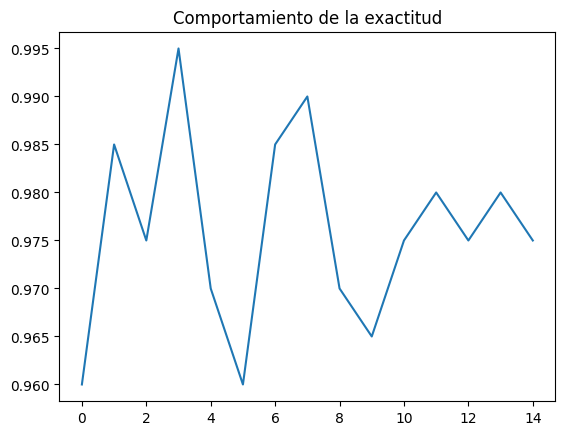

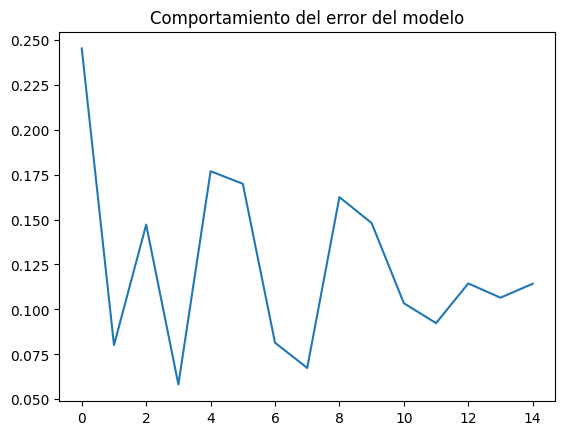

In [10]:
#Proceso de graficacion con matplolib
plt.title('Comportamiento de la exactitud')
plt.plot(epocas,exactitud)
plt.figure()
plt.title('Comportamiento del error del modelo')
plt.plot(epocas,loss)
plt.show()

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Recall()])

history = model.fit(train_generator, steps_per_epoch=10, epochs=15, validation_data=test_generator, validation_steps=15, verbose=2)

Epoch 1/15
10/10 - 18s - loss: 0.2063 - accuracy: 0.9000 - recall: 0.1429 - val_loss: 0.1005 - val_accuracy: 0.9800 - val_recall: 0.0000e+00 - 18s/epoch - 2s/step
Epoch 2/15
10/10 - 15s - loss: 0.1205 - accuracy: 0.9800 - recall: 0.0000e+00 - val_loss: 0.0706 - val_accuracy: 0.9867 - val_recall: 0.0000e+00 - 15s/epoch - 1s/step
Epoch 3/15
10/10 - 15s - loss: 0.0948 - accuracy: 0.9850 - recall: 0.0000e+00 - val_loss: 0.0869 - val_accuracy: 0.9833 - val_recall: 0.0000e+00 - 15s/epoch - 2s/step
Epoch 4/15
10/10 - 16s - loss: 0.0819 - accuracy: 0.9850 - recall: 0.0000e+00 - val_loss: 0.0902 - val_accuracy: 0.9833 - val_recall: 0.0000e+00 - 16s/epoch - 2s/step
Epoch 5/15
10/10 - 16s - loss: 0.1194 - accuracy: 0.9750 - recall: 0.0000e+00 - val_loss: 0.0877 - val_accuracy: 0.9867 - val_recall: 0.0000e+00 - 16s/epoch - 2s/step
Epoch 6/15
10/10 - 16s - loss: 0.1387 - accuracy: 0.9750 - recall: 0.0000e+00 - val_loss: 0.1617 - val_accuracy: 0.9633 - val_recall: 0.0000e+00 - 16s/epoch - 2s/step
Ep

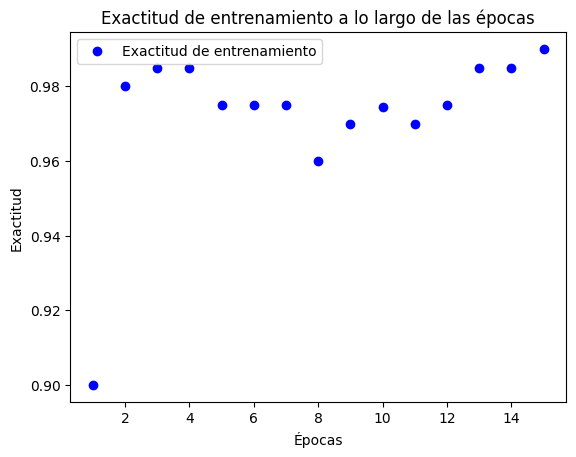

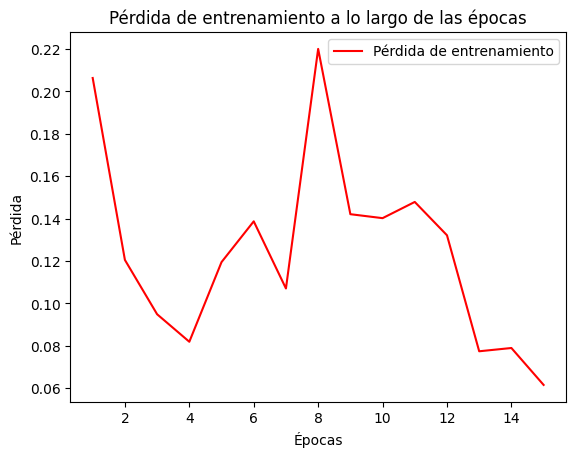

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Suponiendo que ya tienes el historial 'history' después de entrenar tu modelo
# Puedes usar el siguiente código para calcular y visualizar la exactitud y pérdida a lo largo de las épocas.

# Parametro exactitud (accuracy) está guardado en history que tiene el modelo
exactitud = history.history['accuracy']

# Parametro de análisis de pérdidas de estimación
perdida = history.history['loss']

# Medimos el comportamiento de las épocas en la exactitud
epocas = range(1, len(exactitud) + 1)

# Visualización de la exactitud a lo largo de las épocas
plt.plot(epocas, exactitud, 'bo', label='Exactitud de entrenamiento')
plt.title('Exactitud de entrenamiento a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

# Visualización de la pérdida a lo largo de las épocas
plt.plot(epocas, perdida, 'r', label='Pérdida de entrenamiento')
plt.title('Pérdida de entrenamiento a lo largo de las épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
